In [14]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('Downloads/data.csv')
del data['Unnamed: 32']

In [15]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

C:\Users\Ilham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
# Initialising the ANN
classifier = Sequential()

In [19]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\Ilham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
C:\Users\Ilham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [20]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\Ilham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
C:\Users\Ilham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [21]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\Users\Ilham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [22]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Fitting the ANN to the Training set
hist = classifier.fit(X_train, y_train, batch_size=1000, nb_epoch=500, validation_data=(X_test, y_test))
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

C:\Users\Ilham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 512 samples, validate on 57 samples
Epoch 1/500
512/512 [==============================] - 2s 4ms/step - loss: 0.6933 - accuracy: 0.3613 - val_loss: 0.6931 - val_accuracy: 0.5965
Epoch 2/500
512/512 [==============================] - 0s 17us/step - loss: 0.6930 - accuracy: 0.6699 - val_loss: 0.6928 - val_accuracy: 0.6140
Epoch 3/500
512/512 [==============================] - 0s 25us/step - loss: 0.6927 - accuracy: 0.6738 - val_loss: 0.6926 - val_accuracy: 0.6140
Epoch 4/500
512/512 [==============================] - 0s 5us/step - loss: 0.6925 - accuracy: 0.6504 - val_loss: 0.6923 - val_accuracy: 0.6140
Epoch 5/500
512/512 [==============================] - 0s 32us/step - loss: 0.6922 - accuracy: 0.6582 - val_loss: 0.6920 - val_accuracy: 0.6140
Epoch 6/500
512/512 [==============================] - 0s 29us/step - loss: 0.6918 - accuracy: 0.6641 - val_loss: 0.6918 - val_accuracy: 0.6140
Epoch 7/500
512/512 [==============================] - 0s 27us/step - loss: 0.6915 - accuracy

Epoch 58/500
512/512 [==============================] - 0s 16us/step - loss: 0.5383 - accuracy: 0.9434 - val_loss: 0.5368 - val_accuracy: 0.9123
Epoch 59/500
512/512 [==============================] - 0s 18us/step - loss: 0.5337 - accuracy: 0.9453 - val_loss: 0.5292 - val_accuracy: 0.9123
Epoch 60/500
512/512 [==============================] - 0s 10us/step - loss: 0.5234 - accuracy: 0.9453 - val_loss: 0.5213 - val_accuracy: 0.9123
Epoch 61/500
512/512 [==============================] - 0s 15us/step - loss: 0.5139 - accuracy: 0.9453 - val_loss: 0.5133 - val_accuracy: 0.9123
Epoch 62/500
512/512 [==============================] - 0s 29us/step - loss: 0.5083 - accuracy: 0.9453 - val_loss: 0.5052 - val_accuracy: 0.9123
Epoch 63/500
512/512 [==============================] - 0s 21us/step - loss: 0.5005 - accuracy: 0.9453 - val_loss: 0.4969 - val_accuracy: 0.9123
Epoch 64/500
512/512 [==============================] - 0s 11us/step - loss: 0.4926 - accuracy: 0.9453 - val_loss: 0.4887 - val_ac

Epoch 115/500
512/512 [==============================] - 0s 16us/step - loss: 0.1755 - accuracy: 0.9707 - val_loss: 0.1657 - val_accuracy: 0.9298
Epoch 116/500
512/512 [==============================] - 0s 19us/step - loss: 0.1740 - accuracy: 0.9688 - val_loss: 0.1628 - val_accuracy: 0.9298
Epoch 117/500
512/512 [==============================] - 0s 14us/step - loss: 0.1772 - accuracy: 0.9688 - val_loss: 0.1600 - val_accuracy: 0.9298
Epoch 118/500
512/512 [==============================] - 0s 15us/step - loss: 0.1709 - accuracy: 0.9688 - val_loss: 0.1573 - val_accuracy: 0.9298
Epoch 119/500
512/512 [==============================] - 0s 12us/step - loss: 0.1669 - accuracy: 0.9688 - val_loss: 0.1547 - val_accuracy: 0.9298
Epoch 120/500
512/512 [==============================] - 0s 16us/step - loss: 0.1677 - accuracy: 0.9707 - val_loss: 0.1522 - val_accuracy: 0.9298
Epoch 121/500
512/512 [==============================] - 0s 11us/step - loss: 0.1627 - accuracy: 0.9707 - val_loss: 0.1498 -

Epoch 172/500
512/512 [==============================] - 0s 15us/step - loss: 0.0960 - accuracy: 0.9785 - val_loss: 0.0890 - val_accuracy: 0.9649
Epoch 173/500
512/512 [==============================] - 0s 22us/step - loss: 0.0956 - accuracy: 0.9785 - val_loss: 0.0883 - val_accuracy: 0.9649
Epoch 174/500
512/512 [==============================] - 0s 23us/step - loss: 0.0949 - accuracy: 0.9785 - val_loss: 0.0875 - val_accuracy: 0.9649
Epoch 175/500
512/512 [==============================] - 0s 30us/step - loss: 0.0921 - accuracy: 0.9785 - val_loss: 0.0868 - val_accuracy: 0.9649
Epoch 176/500
512/512 [==============================] - 0s 29us/step - loss: 0.0952 - accuracy: 0.9785 - val_loss: 0.0861 - val_accuracy: 0.9649
Epoch 177/500
512/512 [==============================] - 0s 38us/step - loss: 0.0950 - accuracy: 0.9805 - val_loss: 0.0854 - val_accuracy: 0.9649
Epoch 178/500
512/512 [==============================] - 0s 44us/step - loss: 0.0914 - accuracy: 0.9805 - val_loss: 0.0847 -

Epoch 229/500
512/512 [==============================] - 0s 39us/step - loss: 0.0716 - accuracy: 0.9824 - val_loss: 0.0546 - val_accuracy: 0.9649
Epoch 230/500
512/512 [==============================] - 0s 41us/step - loss: 0.0687 - accuracy: 0.9824 - val_loss: 0.0542 - val_accuracy: 0.9649
Epoch 231/500
512/512 [==============================] - 0s 48us/step - loss: 0.0649 - accuracy: 0.9844 - val_loss: 0.0538 - val_accuracy: 0.9649
Epoch 232/500
512/512 [==============================] - 0s 4us/step - loss: 0.0706 - accuracy: 0.9844 - val_loss: 0.0534 - val_accuracy: 0.9649
Epoch 233/500
512/512 [==============================] - 0s 31us/step - loss: 0.0674 - accuracy: 0.9844 - val_loss: 0.0530 - val_accuracy: 0.9649
Epoch 234/500
512/512 [==============================] - 0s 25us/step - loss: 0.0674 - accuracy: 0.9844 - val_loss: 0.0526 - val_accuracy: 0.9649
Epoch 235/500
512/512 [==============================] - 0s 39us/step - loss: 0.0676 - accuracy: 0.9824 - val_loss: 0.0522 - 

Epoch 286/500
512/512 [==============================] - 0s 30us/step - loss: 0.0642 - accuracy: 0.9863 - val_loss: 0.0394 - val_accuracy: 0.9825
Epoch 287/500
512/512 [==============================] - 0s 34us/step - loss: 0.0613 - accuracy: 0.9824 - val_loss: 0.0393 - val_accuracy: 0.9825
Epoch 288/500
512/512 [==============================] - 0s 31us/step - loss: 0.0594 - accuracy: 0.9863 - val_loss: 0.0392 - val_accuracy: 0.9825
Epoch 289/500
512/512 [==============================] - 0s 35us/step - loss: 0.0524 - accuracy: 0.9863 - val_loss: 0.0390 - val_accuracy: 0.9825
Epoch 290/500
512/512 [==============================] - 0s 31us/step - loss: 0.0592 - accuracy: 0.9824 - val_loss: 0.0389 - val_accuracy: 0.9825
Epoch 291/500
512/512 [==============================] - 0s 40us/step - loss: 0.0578 - accuracy: 0.9863 - val_loss: 0.0388 - val_accuracy: 0.9825
Epoch 292/500
512/512 [==============================] - 0s 17us/step - loss: 0.0552 - accuracy: 0.9824 - val_loss: 0.0386 -

Epoch 343/500
512/512 [==============================] - 0s 16us/step - loss: 0.0579 - accuracy: 0.9824 - val_loss: 0.0347 - val_accuracy: 0.9825
Epoch 344/500
512/512 [==============================] - 0s 50us/step - loss: 0.0552 - accuracy: 0.9883 - val_loss: 0.0347 - val_accuracy: 0.9825
Epoch 345/500
512/512 [==============================] - 0s 33us/step - loss: 0.0559 - accuracy: 0.9883 - val_loss: 0.0346 - val_accuracy: 0.9825
Epoch 346/500
512/512 [==============================] - 0s 0us/step - loss: 0.0516 - accuracy: 0.9883 - val_loss: 0.0346 - val_accuracy: 0.9825
Epoch 347/500
512/512 [==============================] - 0s 31us/step - loss: 0.0546 - accuracy: 0.9883 - val_loss: 0.0345 - val_accuracy: 0.9825
Epoch 348/500
512/512 [==============================] - 0s 2us/step - loss: 0.0486 - accuracy: 0.9863 - val_loss: 0.0344 - val_accuracy: 0.9825
Epoch 349/500
512/512 [==============================] - 0s 3us/step - loss: 0.0541 - accuracy: 0.9863 - val_loss: 0.0344 - va

Epoch 400/500
512/512 [==============================] - 0s 16us/step - loss: 0.0495 - accuracy: 0.9902 - val_loss: 0.0323 - val_accuracy: 0.9825
Epoch 401/500
512/512 [==============================] - 0s 46us/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0322 - val_accuracy: 0.9825
Epoch 402/500
512/512 [==============================] - 0s 0us/step - loss: 0.0523 - accuracy: 0.9902 - val_loss: 0.0322 - val_accuracy: 0.9825
Epoch 403/500
512/512 [==============================] - 0s 18us/step - loss: 0.0445 - accuracy: 0.9902 - val_loss: 0.0321 - val_accuracy: 0.9825
Epoch 404/500
512/512 [==============================] - 0s 33us/step - loss: 0.0512 - accuracy: 0.9922 - val_loss: 0.0320 - val_accuracy: 0.9825
Epoch 405/500
512/512 [==============================] - 0s 33us/step - loss: 0.0544 - accuracy: 0.9863 - val_loss: 0.0320 - val_accuracy: 0.9825
Epoch 406/500
512/512 [==============================] - 0s 0us/step - loss: 0.0486 - accuracy: 0.9922 - val_loss: 0.0319 - v

Epoch 457/500
512/512 [==============================] - 0s 17us/step - loss: 0.0406 - accuracy: 0.9922 - val_loss: 0.0305 - val_accuracy: 0.9825
Epoch 458/500
512/512 [==============================] - 0s 42us/step - loss: 0.0462 - accuracy: 0.9922 - val_loss: 0.0305 - val_accuracy: 0.9825
Epoch 459/500
512/512 [==============================] - 0s 26us/step - loss: 0.0428 - accuracy: 0.9922 - val_loss: 0.0305 - val_accuracy: 0.9825
Epoch 460/500
512/512 [==============================] - 0s 25us/step - loss: 0.0449 - accuracy: 0.9902 - val_loss: 0.0305 - val_accuracy: 0.9825
Epoch 461/500
512/512 [==============================] - 0s 42us/step - loss: 0.0469 - accuracy: 0.9902 - val_loss: 0.0304 - val_accuracy: 0.9825
Epoch 462/500
512/512 [==============================] - 0s 20us/step - loss: 0.0391 - accuracy: 0.9922 - val_loss: 0.0304 - val_accuracy: 0.9825
Epoch 463/500
512/512 [==============================] - 0s 27us/step - loss: 0.0426 - accuracy: 0.9922 - val_loss: 0.0304 -

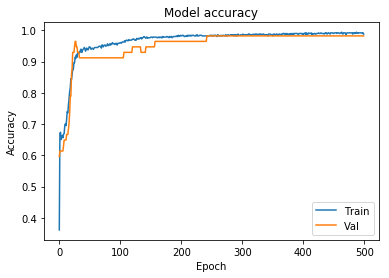

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

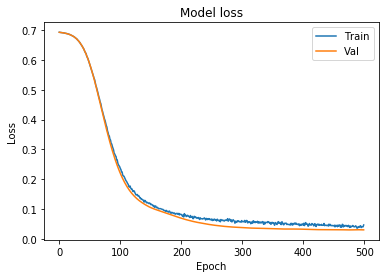

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%


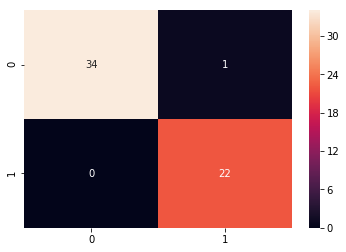

In [29]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')